In [12]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader, Dataset
from torchvision import datasets, transforms
from scipy.stats import norm, chi2, uniform
from pqm import pqm_chi2, pqm_pvalue

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
# Set font to Computer 
# mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
plt.rc("text", usetex=True)

In [13]:
test_data = datasets.MNIST(root='../data', train=False, download=True, transform=None)
train_data = datasets.MNIST(root='../data', train=True, download=True, transform=None)

In [14]:
test_data = test_data.data.reshape(-1, 28*28)/255
train_data = train_data.data.reshape(-1, 28*28)/255
all_data = torch.cat([test_data, train_data], dim=0).detach().numpy()
np.random.shuffle(all_data)
x_samples = all_data[:35000]
y_samples = all_data[35000:]

In [15]:
zs = []
dof_array = []
num_repeats = 35
n = len(x_samples) // num_repeats

for i in range(num_repeats):
    for _ in range(num_repeats):
        z, dof = pqm_chi2(x_samples[i*n:(i+1)*n], y_samples[i*n:(i+1)*n])
        zs.append(z)
        dof_array.append(dof)
    

print(np.unique(dof_array), np.mean(zs), np.std(zs))

[95 96 97 98 99] 98.37167423239205 14.129386428776144


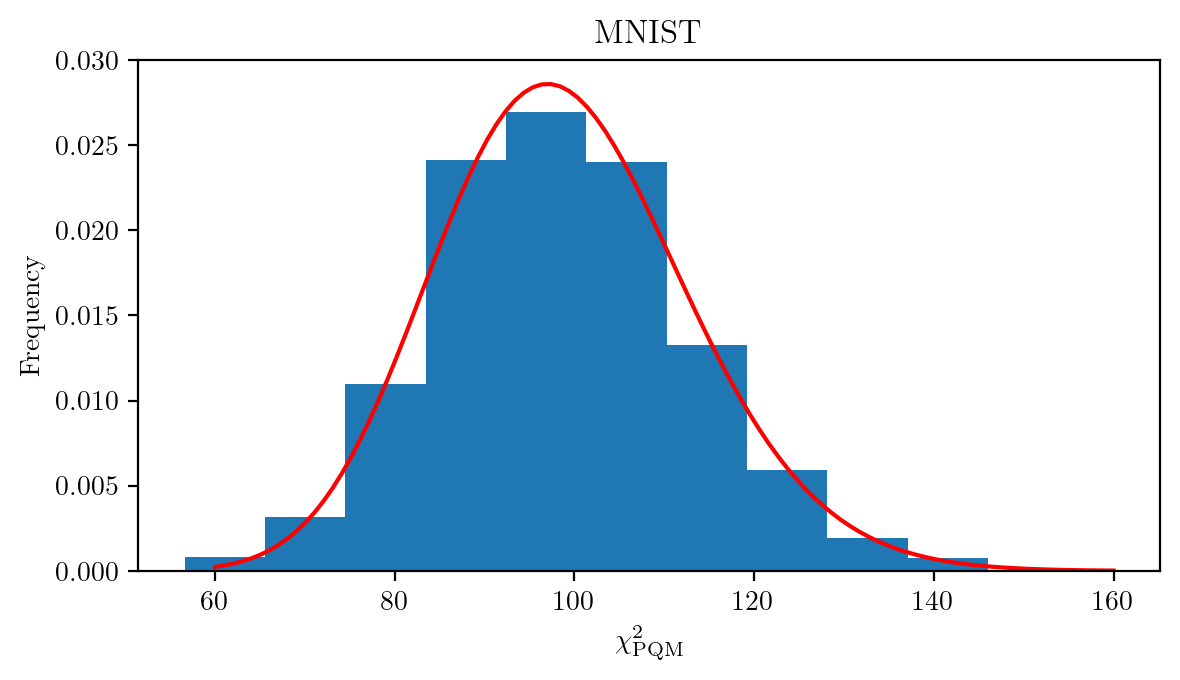

In [16]:
fig, ax = plt.subplots(figsize=(6, 3.5))
ax.hist(zs, bins=10, density=True)
ax.plot(np.linspace(60, 160, 100), chi2.pdf(np.linspace(60, 160, 100), df=99), color='red')
ax.set_xlabel(r'$\chi^2_{{\rm PQM}}$')
ax.set_ylabel('Frequency')
plt.title('MNIST')
plt.tight_layout()
plt.show()

In [17]:
p_val = []
dof_array = []
num_repeats = 35
n = len(x_samples) // num_repeats

for i in range(num_repeats):
    for _ in range(num_repeats):
        pval = pqm_pvalue(x_samples[i*n:(i+1)*n], y_samples[i*n:(i+1)*n])
        p_val.append(pval)

In [18]:
if np.abs(np.mean(p_val) - 0.5) < 0.15:
    print("Do not reject the null hypothesis")
else:
    print("Reject the null hypothesis")

Do not reject the null hypothesis


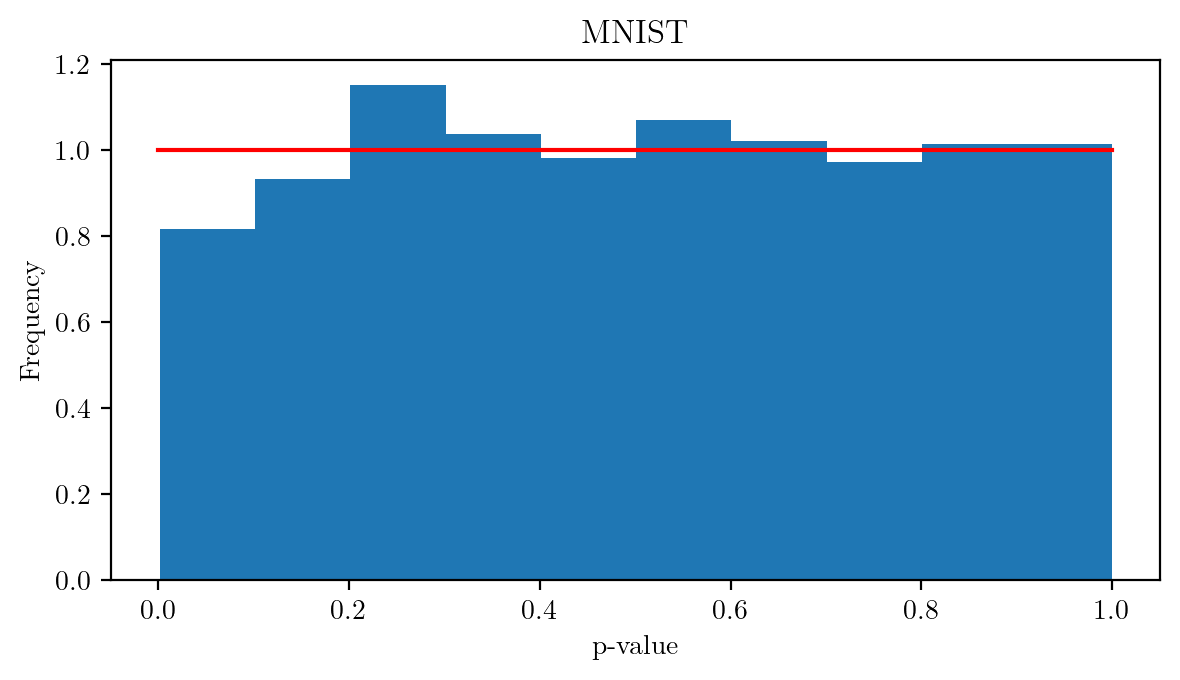

In [19]:
fig, ax = plt.subplots(figsize=(6, 3.5))
ax.hist(p_val, bins=10, density=True)
# ax.plot(np.linspace(60, 160, 100), chi2.pdf(np.linspace(60, 160, 100), df=99), color='red')
ax.plot(np.linspace(0, 1, 100), uniform.pdf(np.linspace(0, 1, 100), loc=0, scale=1-0), color='red')

ax.set_xlabel('p-value')
ax.set_ylabel('Frequency')
plt.title('MNIST')
plt.tight_layout()
plt.show()